In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [10]:
x = df.drop('Weight', axis=1)
y = df['Weight']

In [11]:
x.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [12]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
x.Gender = le.fit_transform(x.Gender)

In [18]:
x.Gender

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

# Training & Testing

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y, test_size=.70, random_state=2)

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [29]:
lr.coef_

array([18.97339548,  6.0063621 ])

In [30]:
lr.intercept_

-246.58758068656866

In [31]:
lr.predict(xtest)

array([150.84412828, 159.46640672, 195.34164249, ..., 157.04900851,
       123.37849996, 162.08615711])

In [34]:
lr.score(x,y)

0.8998994545621704

In [35]:
lr.score(xtest, ytest)

0.9003707294876292

# Mean Squred Error & Mean Absolute Error

In [38]:
from sklearn.metrics import mean_squared_error
pred = lr.predict(xtest)
mse = mean_squared_error(ytest, pred)

In [39]:
mse

102.9984271369102

In [40]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error (ytest, pred)

In [41]:
mae

8.032079781637112

# Knn Algorithm, Knn Regressor

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
knn = KNeighborsRegressor()

In [45]:
knn.fit(xtest, ytest)  # Model fittingn 

KNeighborsRegressor()

In [46]:
knn.predict(xtest)

array([154.01905702, 155.44275638, 192.13209526, ..., 154.34463844,
       130.97505534, 157.65638442])

In [47]:
knn.score (xtrain, ytrain)

0.8762514724616339

In [48]:
knn.score (x, y)

0.9073445943096147

In [49]:
knn.score(xtest, ytest)

0.9203356762035673

In [54]:
from sklearn.metrics import mean_squared_error
pred = knn.predict(xtest)
mse = mean_squared_error(ytest, pred)

In [55]:
mse

82.3583271036725

In [57]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, pred) 
mae

7.214182906707298

# RandomizedSearchCV

In [61]:
n_neighbors= np.random.randint(5,25,5)
weights= ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size= np.random.randint(5,50,5)
p= [1,2]

In [62]:
ids= {
    'n_neighbors':n_neighbors,
    'weights':weights,
    'algorithm':algorithm,
    'leaf_size':leaf_size,
    'p':p
}

In [63]:
print(ids)

{'n_neighbors': array([ 9,  8, 19, 19, 15]), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': array([43, 15, 11, 10,  8]), 'p': [1, 2]}


In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
rcv= RandomizedSearchCV(knn, ids, n_iter = 200, cv=3)

In [67]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=200,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([43, 15, 11, 10,  8]),
                                        'n_neighbors': array([ 9,  8, 19, 19, 15]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [68]:
rcv.cv_results_

{'mean_fit_time': array([0.04412754, 0.00200025, 0.00100001, 0.00266639, 0.00200001,
        0.00200446, 0.00200025, 0.00200001, 0.00200001, 0.0023334 ,
        0.00166678, 0.00134484, 0.00233332, 0.00150084, 0.00256236,
        0.00266703, 0.00199993, 0.00266862, 0.00200033, 0.00266671,
        0.00199986, 0.00200081, 0.00166734, 0.00166694, 0.00100017,
        0.0016667 , 0.0016671 , 0.00135215, 0.00166233, 0.0019993 ,
        0.00200113, 0.0013334 , 0.00237823, 0.00218574, 0.00233324,
        0.00199993, 0.00200001, 0.00200041, 0.00233324, 0.0013334 ,
        0.00166686, 0.00233348, 0.00133324, 0.0023334 , 0.00193628,
        0.00199993, 0.00133292, 0.00199946, 0.00133141, 0.00233253,
        0.00166591, 0.0023334 , 0.00233094, 0.00200057, 0.00133308,
        0.00316755, 0.00199986, 0.00133403, 0.00099929, 0.0013334 ,
        0.00134699, 0.00200001, 0.00200001, 0.00166663, 0.00166655,
        0.00100025, 0.00133324, 0.00200017, 0.00099993, 0.00133324,
        0.00200041, 0.00200033,

In [69]:
cv_result = pd.DataFrame(rcv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044128,5.957738e-02,0.015574,1.636866e-02,distance,1,9,8,ball_tree,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.867086,0.866641,0.861427,0.865051,0.002569,166
1,0.002000,2.247832e-07,0.003000,1.123916e-07,uniform,2,19,10,auto,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.893516,0.892356,0.887073,0.890982,0.002804,24
2,0.001000,1.123916e-07,0.095150,9.001389e-02,distance,2,19,11,brute,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.873009,0.873430,0.868125,0.871521,0.002407,144
3,0.002666,4.713142e-04,0.003332,4.721575e-04,distance,2,19,11,kd_tree,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.873009,0.873430,0.868125,0.871521,0.002407,125
4,0.002000,2.973602e-07,0.004000,3.893359e-07,distance,2,19,15,auto,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.873009,0.873430,0.868125,0.871521,0.002407,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.002337,4.767090e-04,0.002948,2.645105e-04,uniform,2,8,43,kd_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.888451,0.887840,0.880533,0.885608,0.003597,83
196,0.002333,4.714266e-04,0.003667,4.715390e-04,distance,2,15,11,auto,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.871414,0.871763,0.866688,0.869955,0.002314,149
197,0.002000,1.123916e-07,0.026420,1.009737e-03,distance,1,15,11,brute,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.871418,0.871723,0.866675,0.869939,0.002311,157
198,0.002676,4.780179e-04,0.002298,4.214685e-04,distance,1,15,10,kd_tree,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.871418,0.871723,0.866675,0.869939,0.002311,157


In [70]:
rcv.best_score_

0.8910089576556167

In [72]:
rcv.best_params_

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 19,
 'leaf_size': 15,
 'algorithm': 'ball_tree'}

In [73]:
knn2= rcv.best_estimator_
knn2

KNeighborsRegressor(algorithm='ball_tree', leaf_size=15, n_neighbors=19, p=1)

In [74]:
knn2.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=15, n_neighbors=19, p=1)

In [75]:
knn2.score(xtrain, ytrain)

0.9020542933605622

In [76]:
knn2.score(xtest, ytest)

0.8941601427284402

In [77]:
knn2.score(x,y)

0.896503400453513

In [78]:
# Obtimization  between tune & knn
0.8941601427284402 - 0.9203356762035673  

-0.026175533475127022

In [79]:
# Obtimization  between tuned knn and linear regression
0.8941601427284402 - 0.9003707294876292  

-0.006210586759188952

In [80]:
pred2 = knn2.predict(xtest)
mse = mean_squared_error(ytest , pred2)
mse

109.4190369085572

In [81]:
mae = mean_absolute_error(ytest , pred2)
mae

8.266613441143148

# KNN Classifier

In [82]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [83]:
df1=df.copy()
df1.Gender=le.fit_transform(df1.Gender)
df1.Gender

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

In [84]:
x1= df1.drop('Gender', axis=1)
y1=df1['Gender']

In [85]:
x1.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [86]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [87]:
x1train, x1test,y1train, y1test = train_test_split(x1, y1,test_size=.30, random_state=1)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier(n_neighbors=10)

In [89]:
knn_clf.fit(x1train,y1train)

KNeighborsClassifier(n_neighbors=10)

In [90]:
y1pred= knn_clf.predict(x1test)

In [91]:
knn_clf.score(x1test,y1test)

0.9216984807167901

In [92]:
knn_clf.score(x1train,y1train)

0.9213426853707415

In [93]:
knn_clf.score(x1,y1)

0.9214494447691408

# Confusion Matrix

In [94]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [95]:
print(classification_report(y1test, y1pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1055
           1       0.94      0.92      0.93      1512

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



In [96]:
confusion_matrix(y1test,y1pred)

array([[ 970,   85],
       [ 116, 1396]], dtype=int64)

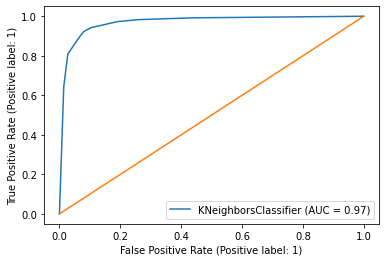

In [97]:
import matplotlib.pyplot as plt
plot_roc_curve(knn_clf, x1test, y1test)
plt.plot([0,1],[0,1])